# Introduction to Time Series Forecasting

A **time series** is a sequence of data points that occur in successive order over some period of time.

A time series can be **yearly** (for example, an annual budget), **quarterly** (for example, expenses), **monthly** (for example, air traffic), **weekly** (for example, sales quantity), **daily** (for example, weather), **hourly** (for example, stock prices), **minutes** (for example, inbound calls in a call centre), or even **seconds** in length, depending on the frequency (ex: web traffic).

- Forecasting is the next step in the process, and it involves predicting the series' future values.

- When you generate scientific forecasts based on historical time stamped data, you're doing **time series forecasting**.

- It entails developing models based on previous data and applying them to make observations and guide future strategic decisions.

-  A key distinction in forecasting is that the future outcome is completely unknown at the time of the work and can only be anticipated by meticulous analysis and evidence-based priors.

Now forecasting a time series can be broadly divided into two types.

- **Univariate Time Series Forecasting** is when you utilise only the prior values of a time series to predict its future values.

**For example** Here we have to forecast close price, so we are taking only past close prices to forecast prices in upcoming days

| Close |
| --- |
| 67.405298 |
| 68.459983 |
| 69.785998 |
| 70.225955 |
| 65.345345 |
| 68.353453 |
| 69.345347 |

--------------------------------

- **Multi Variate Time Series Forecasting** is when you employ predictors other than the series (also known as exogenous variables) to forecast.

**For example** Here close price value is dependent on open, high and low price values so we can use all these as features to fit our multivariate model and forecast close price value.

| Close | Open | High | Low |
| --- | --- | --- | --- |
| 67.405998 | 70.123879 | 70.234878 | 66.438729 |
| 68.673246 | 71.237498 | 71.349828 | 67.278949	|
| 69.378432 | 72.892348 | 73.238947 | 68.298137	|
| 70.482379 | 71.782687 | 71.172838 | 66.982374	|
| 65.238973 | 74.928749 | 75.823890 | 63.287343	|
| 68.289349 | 75.389724 | 76.982479 | 66.248789	|
| 69.732878 | 78.287389 | 79.983789 | 65.737999	|

<hr style="border:1px solid black"> </hr>

#  Introduction to ARIMA Models

- ARIMA models are a type of statistical model that can be used to analyse and forecast time series data.
-  It gives a simple yet powerful way for creating time series forecasts by explicitly catering to a set of common structures in time series data.

- ARIMA is an acronym for **AutoRegressive Integrated Moving Average**.

- It's a more complex version of the AutoRegressive Moving Average, with the addition of integration.


An ARIMA model is characterized by 3 terms: p, d, q
where,

- **p** is the order of the AR term. The number of lag observations included in the model, also called the lag order.

- **q** is the size of the moving average window, also called the order of moving average.

- **d** is the number of differencing required to make the time series stationary.

**What does ARIMA(p, d, q) mean?**

For example :

- ARIMA(1, 0, 3) signifies that you're combining a 1st order Auto-Regressive model and a 3rd order Moving Average model to describe some response variable (Y) in your model.
- It's a good idea to think about it this way: (AR, I, MA).
- In simple words, this gives your model the following appearance:

    Y = (Auto-Regressive Parameters) + (Moving Average Parameters)

    The 0 between the 1 and the 3 represents the 'I' part of the model (the Integrative component), which denotes a model that takes the difference between response variable data - this can be done with non-stationary data, but you don't appear to be dealing with that, so ignore it.


- ARIMA(2, 1, 2) signifies that you're combining a 2nd order AR model and also a 2nd order MA model to describe Y.
-  d = 1st denotes that the model used 1 order differencing to make the data stationary.

Just like these examples we have to find perfect order of p, d and q to fit the best model.

**There are a number of ways to find values of p, q and d:**

- look at an autocorrelation graph of the data (will help if Moving Average (MA) model is appropriate)
- look at a partial autocorrelation graph of the data (will help if AutoRegressive (AR) model is appropriate)
- look at extended autocorrelation chart of the data (will help if a combination of AR and MA are needed)
- try Akaike's Information Criterion (AIC) on a set of models and investigate the models with the lowest AIC values
- try the Schwartz Bayesian Information Criterion (BIC) and investigate the models with the lowest BIC values
-------------------------------
Before working with non-stationary data, the Autoregressive Integrated Moving Average (ARIMA) Model converts it to stationary data. One of the most widely used models for predicting linear time series data is this one.

The ARIMA model has been widely utilized in banking and economics since it is recognized to be reliable, efficient, and capable of predicting short-term share market movements.


<hr style="border:1px solid black"> </hr>

**Problem Statement** : In this notebook, we are going to use the ARIMA, SARIMA and Auto ARIMA model to forecast the stock price of Tesla.
<hr style="border:1px solid black"> </hr>

## Import the necessary libraries

In [2]:
!pip install pmdarima -q
!pip install yfinance -q

In [3]:

import os

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA


from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import yfinance as yf
from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

## Loading the dataset

We are using historical prices of 3 year (12/2018 - 12/2021) for Tesla stock.

In [4]:
tsla = yf.Ticker('TSLA')

In [5]:
tsla = yf.Ticker('TSLA')

# get historical data as hist
hist = tsla.history(period="3y")

# Save dataframe as CSV file
hist.to_csv('TSLA.csv')

ERROR:yfinance:TSLA: Period '3y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']


In [9]:
stock_data = pd.read_csv('/content/TSLA.CSV')
stock_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


In [10]:
# As we are performing UniVariate Time Series Analysis so we will conside only close price.

stock_data = stock_data[['Date','Close']] # filtering the dataframe to date and close price

In [11]:
stock_data

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002
...,...,...
753,2022-05-16,724.369995
754,2022-05-17,761.609985
755,2022-05-18,709.809998
756,2022-05-19,709.419983


In [14]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [16]:
#pd.to_datetime()#this method we use for coverting into date time

In [17]:
stock_data.Date = pd.to_datetime(stock_data.Date) # convert Date data type ('object') to datetime

In [18]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [19]:
stock_data

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002
...,...,...
753,2022-05-16,724.369995
754,2022-05-17,761.609985
755,2022-05-18,709.809998
756,2022-05-19,709.419983


In [20]:
stock_data = stock_data.set_index("Date") # setting date as index

In [21]:
stock_data.head(5)

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002


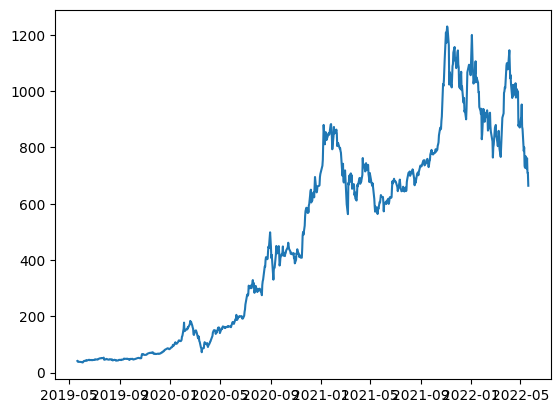

In [22]:
import matplotlib.pyplot as plt
plt.plot(stock_data['Close'])

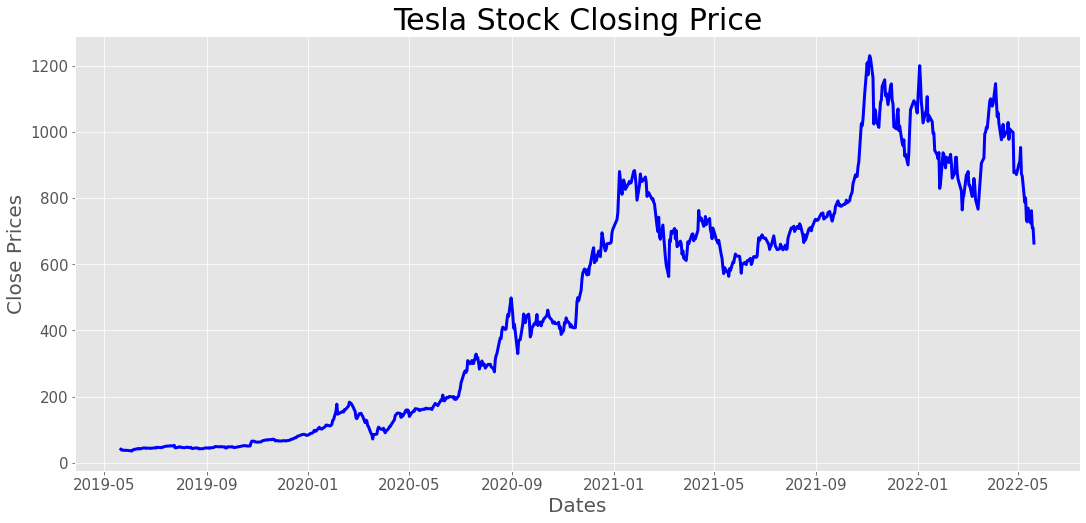

In [ ]:
# plotting close price
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.xticks(fontsize = 15)
plt.ylabel('Close Prices', fontsize = 20)
plt.yticks(fontsize = 15)
plt.plot(stock_data['Close'], linewidth = 3, color = 'blue')
plt.title('Tesla Stock Closing Price', fontsize = 30)
plt.show()

<AxesSubplot:xlabel='Close', ylabel='Density'>

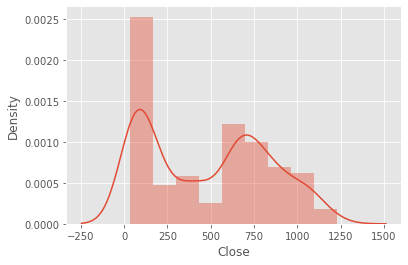

In [ ]:
import seaborn as sns
sns.distplot(stock_data['Close'])


A probability distribution can also be used to illustrate the data in our series.

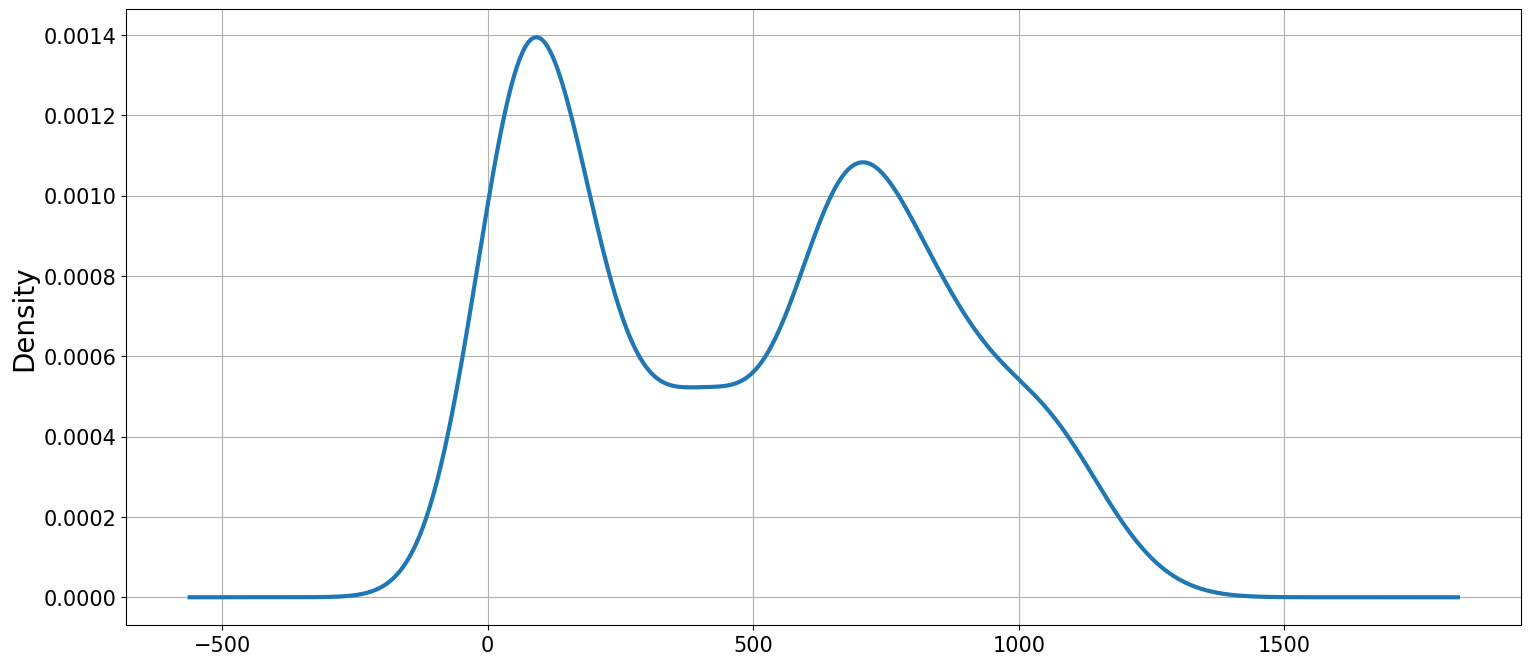

In [23]:
# Distribution of the close price
df_close = stock_data['Close']
df_close.plot(kind='kde',figsize = (18,8), linewidth= 3)
plt.xticks(fontsize = 15)
plt.grid("both")
plt.ylabel('Density', fontsize = 20)
plt.yticks(fontsize = 15)
plt.show()

<hr style="border:1px solid black"> </hr>
A time series is also thought to include three systematic components: level, trend, and seasonality, as well as one non-systematic component termed noise.

The components' definitions are as follows:
- The **level** is the sum of all the values in a series.
- The **trend** is the upward or downward movement of the series' value.
- The series' short-term cycle is known as **seasonality**.
- **Noise** is the term for the random variation in the series.
------------------------------------
## Check for stationarity

Time series analysis only works with stationary data, so we must first determine **whether a series is stationary.**
Stationary time series is when the mean and variance are constant over time. It is easier to predict when the series is stationary.

**What does it mean for data to be stationary?**

- The mean of the series should not be a function of time. Because the mean increases over time, the red graph below is not stationary.

<img src="https://imgur.com/LjtBXwf.png">
- The variance of the series should not be a function of time. Homoscedasticity is the term for this characteristic. The varying spread of data over time can be seen in the red graph.

<img src="https://imgur.com/v2Uye7X.png">

- Finally, neither the I th term nor the (I + m) th term's covariance should be a function of time. As you can see in the graph below, the spread gets less as time goes on. As a result, the'red series' covariance does not remain constant throughout time.

<img src="https://i.imgur.com/6HVlvg2.png">

<hr style="border:1px solid black"> </hr>

### ADF (Augmented Dickey-Fuller) Test

- The Dickey-Fuller test is one of the most extensively used statistical tests. - It can be used to establish whether a series has a unit root and, as a result, whether the series is stationary.
- The null and alternate hypotheses for this test are:
Distinguish between point to point links and multi point links
**Null Hypothesis**: The series has a unit root (a =1).

**Alternative Hypothesis**: There is no unit root in the series.

- The series is considered to be non-stationary if the null hypothesis is not rejected.
- As a result, the series can be linear or difference stationary.
- If both the mean and standard deviation are flat lines, the series becomes stationary (constant mean and constant variance).

In [24]:
stock_data

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002
...,...
2022-05-16,724.369995
2022-05-17,761.609985
2022-05-18,709.809998


In [25]:
type(stock_data['Close'])

pandas.core.series.Series

In [26]:
np.mean(stock_data['Close'].head(12))

38.51633358001709

In [ ]:
rolmean = stock_data['Close'].rolling(12).mean() # rolling mean
rolstd = stock_data['Close'].rolling(12).std() # rolling standard deviation

In [ ]:
rolmean.head(20)  #Rolling Mean

,Close
Date,
2019-05-21,NaN
2019-05-22,NaN
2019-05-23,NaN
2019-05-24,NaN
2019-05-28,NaN
2019-05-29,NaN
2019-05-30,NaN
2019-05-31,NaN
2019-06-03,NaN


In [ ]:
rolstd.head(20) #rolling STD

,Close
Date,
2019-05-21,NaN
2019-05-22,NaN
2019-05-23,NaN
2019-05-24,NaN
2019-05-28,NaN
2019-05-29,NaN
2019-05-30,NaN
2019-05-31,NaN
2019-06-03,NaN


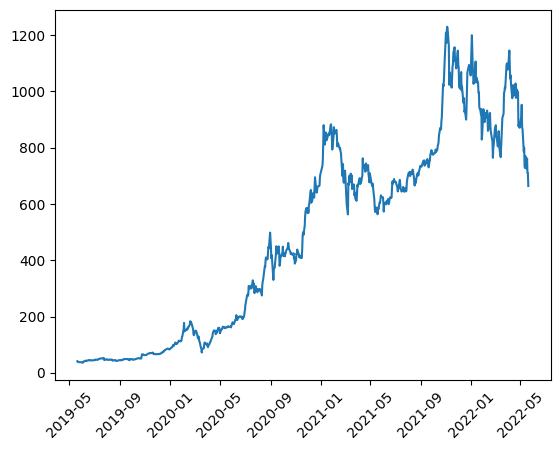

In [29]:
plt.plot(stock_data['Close'])
plt.xticks(rotation = 45)
plt.show()

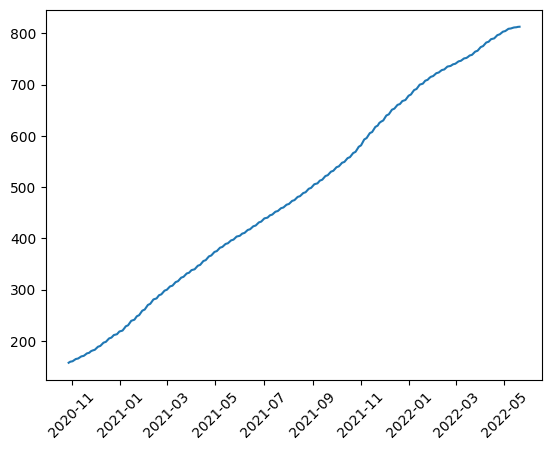

In [32]:
#rolling Mean
plt.plot(stock_data['Close'].rolling(365).mean())
plt.xticks(rotation = 45)
plt.show()

- Plot the Data and Rolling Mean

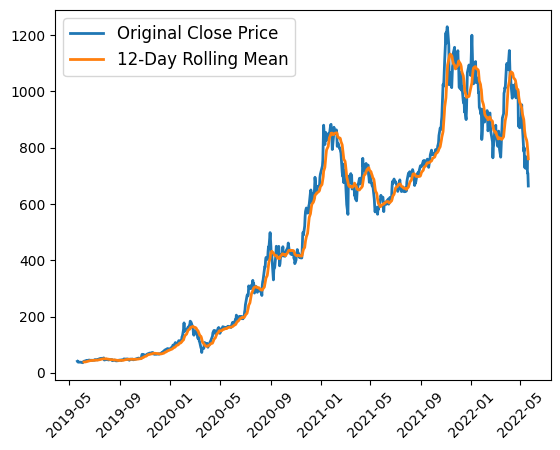

In [49]:
# Plotting the stock close prices and their rolling mean
plt.plot(stock_data['Close'], label='Original Close Price', linewidth=2)
plt.plot(stock_data['Close'].rolling(12).mean(), label='12-Day Rolling Mean', linewidth=2)

# Rotate x-axis labels
plt.xticks(rotation=45)

# Adding the legend to differentiate between original and rolling mean lines
plt.legend(loc='best', fontsize=12)

# Display the plot
plt.show()

##Now it had become smooth

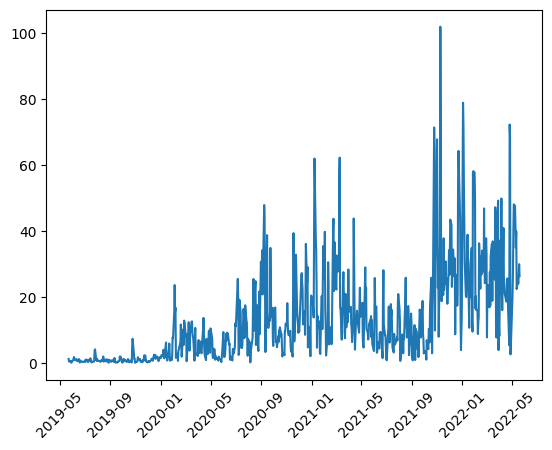

In [50]:
#Standard Devation - >rollind STD
plt.plot(stock_data['Close'].rolling(3).std() )
plt.xticks(rotation = 45)
plt.show()

- Plot the Data and Rolling Standard Devation
- It will make the Smoothing of the data
- This helps to remove the noise and You can easily Visulaize the Data.

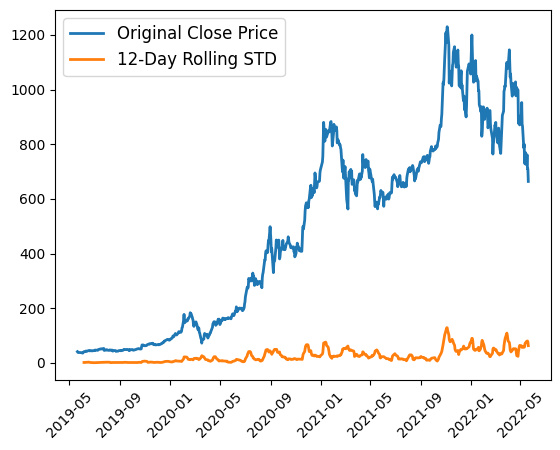

In [55]:
# Plotting the stock close prices and their rolling mean
plt.plot(stock_data['Close'], label='Original Close Price', linewidth=2)
plt.plot(stock_data['Close'].rolling(12).std(), label='12-Day Rolling STD', linewidth=2)

# Rotate x-axis labels
plt.xticks(rotation=45)

# Adding the legend to differentiate between original and rolling mean lines
plt.legend(loc='best', fontsize=12)

# Display the plot
plt.show()

##Now it is not Smoothing ,as we expected

### **ADF Test**

- Do the ADF Test Also with the
- Rolling Mean
- Rolling Std

In [34]:
adfuller(stock_data['Close'],autolag='AIC')

(-1.3630085817037492,
 0.5998762543050696,
 9,
 748,
 {'1%': -3.43912257105195,
  '5%': -2.8654117005229844,
  '10%': -2.568831705010152},
 6794.359259220987)

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Test for stationarity
def test_stationarity(timeseries):
    # Determine rolling statistics
    rolmean = timeseries.rolling(12).mean()  # Rolling mean
    rolstd = timeseries.rolling(12).std()    # Rolling standard deviation

    # Plot rolling statistics:
    plt.figure(figsize=(18, 8))
    plt.grid('both')
    plt.plot(timeseries, color='blue', label='Original', linewidth=3)
    plt.plot(rolmean, color='red', label='Rolling Mean', linewidth=3)
    plt.plot(rolstd, color='black', label='Rolling Std', linewidth=4)
    plt.legend(loc='best', fontsize=20, shadow=True, facecolor='lightpink', edgecolor='k')
    plt.title('Rolling Mean and Standard Deviation', fontsize=25)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.show(block=False)

    # Perform the ADF test
    print("Results of the Dickey-Fuller test:")
    adft = adfuller(timeseries, autolag='AIC')
    # Output for the ADF test will give us values without defining what the values are.
    # Hence we manually write what values they explain using a for loop
    output = pd.Series(adft[0:4], index=['Test Statistic', 'p-value', 'No. of Lags Used', 'Number of Observations Used'])
    for key, values in adft[4].items():
        output['Critical Value (%s)' % key] = values
    print(output)

    # Conclusion based on p-value
    if adft[1] <= 0.05:
        print("Reject null hypothesis, the data is stationary")
    else:
        print("Failed to reject null hypothesis, the data is non-stationary")


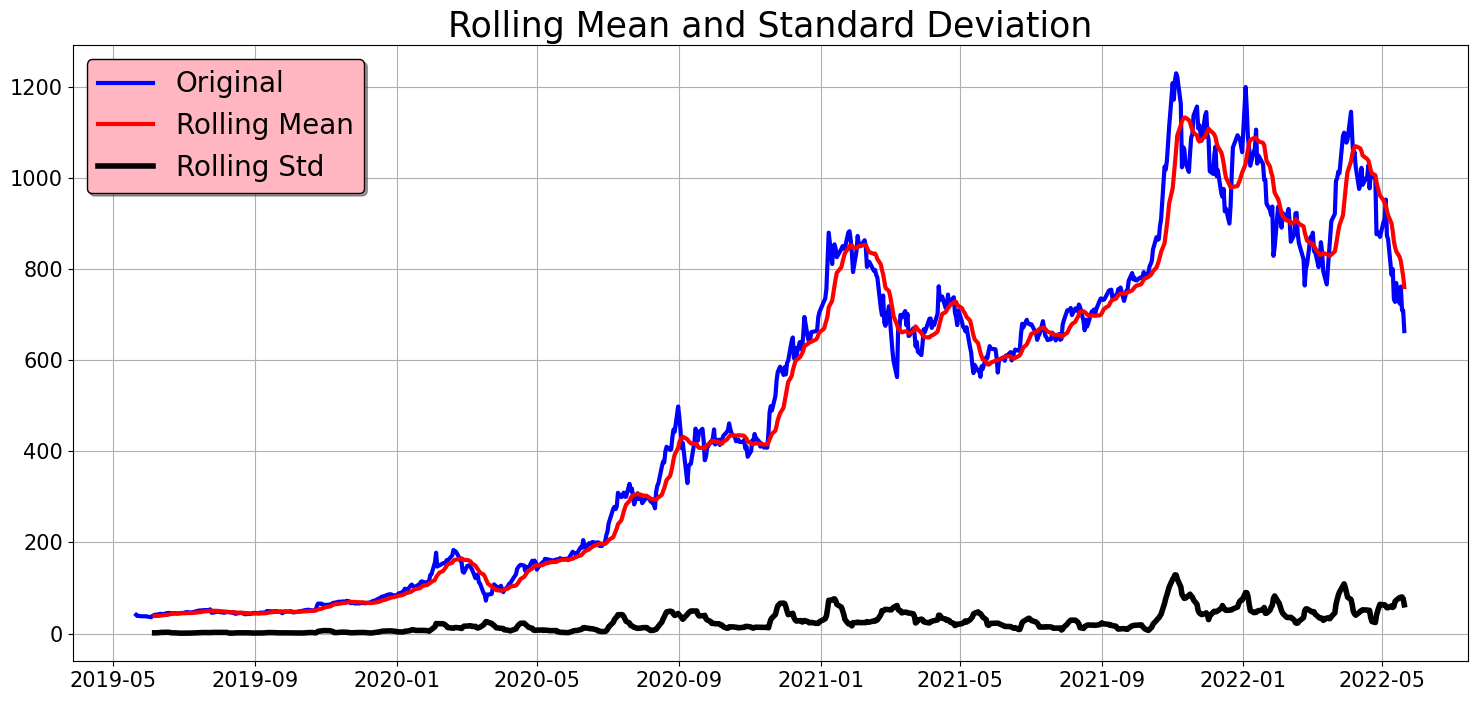

Results of the Dickey-Fuller test:
Test Statistic                  -1.363009
p-value                          0.599876
No. of Lags Used                 9.000000
Number of Observations Used    748.000000
Critical Value (1%)             -3.439123
Critical Value (5%)             -2.865412
Critical Value (10%)            -2.568832
dtype: float64
Failed to reject null hypothesis, the data is non-stationary


In [72]:
##Call Function
test_stationarity(stock_data['Close'])

<hr style="border:1px solid black"> </hr>

-  We can't reject the Null hypothesis because the p-value is bigger than 0.05.

- Furthermore, the test statistics exceed the critical values. As a result, the data is not stationary.

- Differencing is a method of transforming a non-stationary time series into a stationary one.

-  This is an important step in preparing data to be used in an ARIMA model.
- So,
 - To make the data stationary, we need to take the first-order difference of the data. Which is just another way of saying, subtract today’s close price from yesterday’s close price.


In [73]:
df_close = stock_data['Close']

In [74]:
df_close

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002
...,...
2022-05-16,724.369995
2022-05-17,761.609985
2022-05-18,709.809998


In [75]:
38.125999 - 39.098000

-0.9720009999999988

In [76]:
38.546001-41.015999

-2.469998000000004

In [77]:
df_close.diff()

,Close
Date,
2019-05-21,NaN
2019-05-22,-2.469997
2019-05-23,0.551998
2019-05-24,-0.972000
2019-05-28,-0.385998
...,...
2022-05-16,-45.220032
2022-05-17,37.239990
2022-05-18,-51.799988


In [78]:
# Get the difference of each Adj Close point
tsla_close_diff_1 = df_close.diff()

In [79]:
tsla_close_diff_1

,Close
Date,
2019-05-21,NaN
2019-05-22,-2.469997
2019-05-23,0.551998
2019-05-24,-0.972000
2019-05-28,-0.385998
...,...
2022-05-16,-45.220032
2022-05-17,37.239990
2022-05-18,-51.799988


### do differencing until it converts into stationary data where mean and variance are constant


In [81]:

tsla_close_diff_1.dropna(inplace=True)

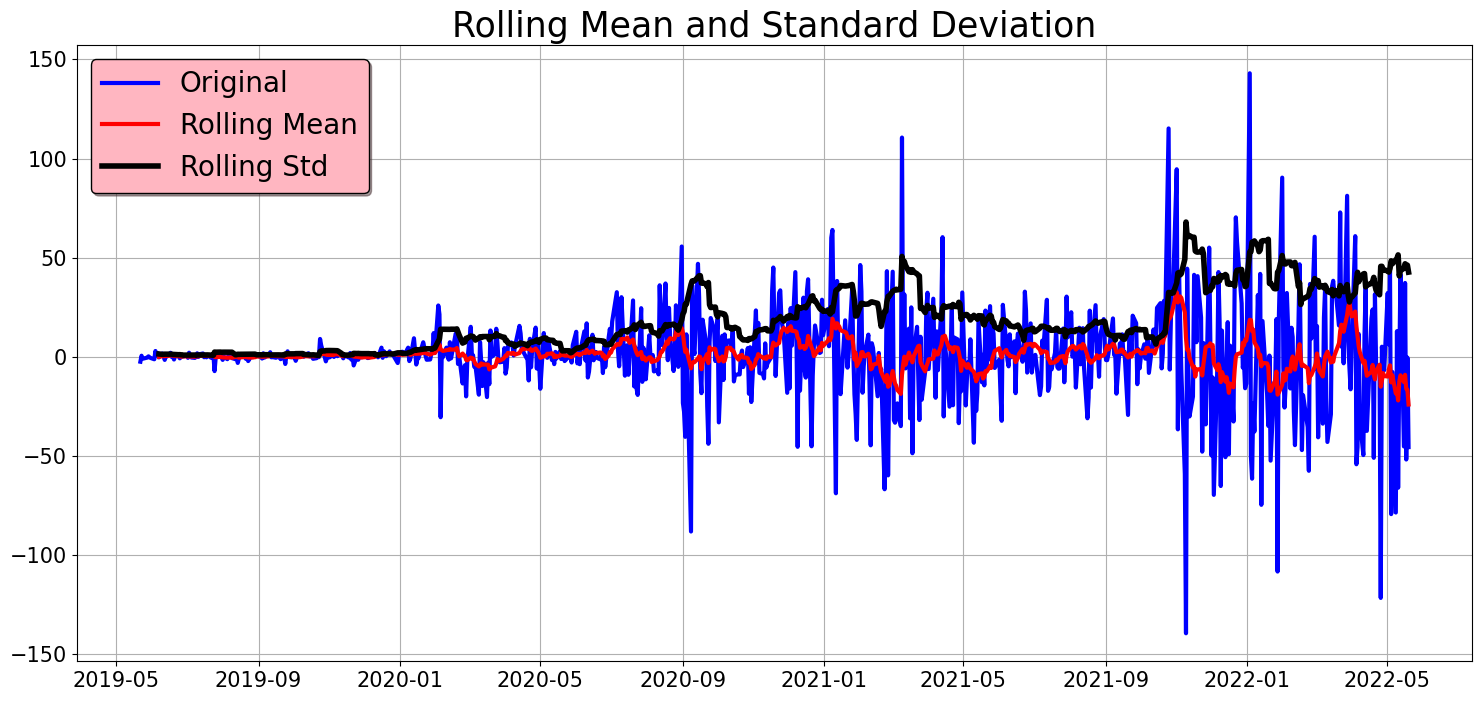

Results of the Dickey-Fuller test:
Test Statistic                -8.324564e+00
p-value                        3.498786e-13
No. of Lags Used               8.000000e+00
Number of Observations Used    7.480000e+02
Critical Value (1%)           -3.439123e+00
Critical Value (5%)           -2.865412e+00
Critical Value (10%)          -2.568832e+00
dtype: float64
Reject null hypothesis, the data is stationary


In [82]:
# Plot the tsla Adj Close 1st order difference
test_stationarity(tsla_close_diff_1)

In [83]:
#we will try to check the treand in the data
#breakdown
#season cycle error as well

- The p-value is obtained is less than significance level of 0.05 and the ADF statistic is lower than any of the critical values.

- We can reject the null hypothesis.
-  So, the time series is in fact stationary.

**Decompose the time series :**
- To start with, we want to decompose the data to seperate the seasonality, trend and residual.
- Since we have 3 years of stock data. We would expect there's a yearly or weekly pattern.
- Let's use a function seasonal_decompose in statsmodels to help us find it.

In [85]:
stock_data[["Close"]]

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002
...,...
2022-05-16,724.369995
2022-05-17,761.609985
2022-05-18,709.809998


In [90]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 758 entries, 2019-05-21 to 2022-05-20
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   758 non-null    float64
dtypes: float64(1)
memory usage: 11.8 KB


In [91]:
stock_data.head()

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002


In [93]:
from statsmodels.tsa.seasonal import seasonal_decompose

- The seasonal_decompose function from the statsmodels library uses an additive model for seasonal decomposition.
-  This means that the model assumes the time series can be expressed as:

𝑌(𝑡) = 𝑇(𝑡)+𝑆(𝑡)+𝐸(𝑡)
Y(t) = T(t)+S(t)+E(t)
Where:

- 𝑌(𝑡)
 - Y(t) is the observed time series.
- 𝑇(𝑡)
 - T(t) is the trend component.
- 𝑆(𝑡)
 - S(t) is the seasonal component.
- 𝐸(𝑡)
 - E(t) is the irregular or residual component.

# Seasonal decomposition
 gives you a clear view of how your data behaves, revealing trends and seasonal patterns.

- Modeling and Forecasting:
 - After understanding the components, you can build better forecasting models.
 - For example,
  - if the residuals from the decomposition are stationary, you can proceed to fit a time series model like ARIMA on those residuals.

- Improving Model Performance:
 - If the ADF test indicates non-stationarity, you might choose to difference the data or adjust for seasonality using the information from the decomposition.
 - This ensures that your forecasts are more accurate.

In [95]:
result = seasonal_decompose(stock_data["Close"],period = 30)

<Figure size 2000x1000 with 0 Axes>

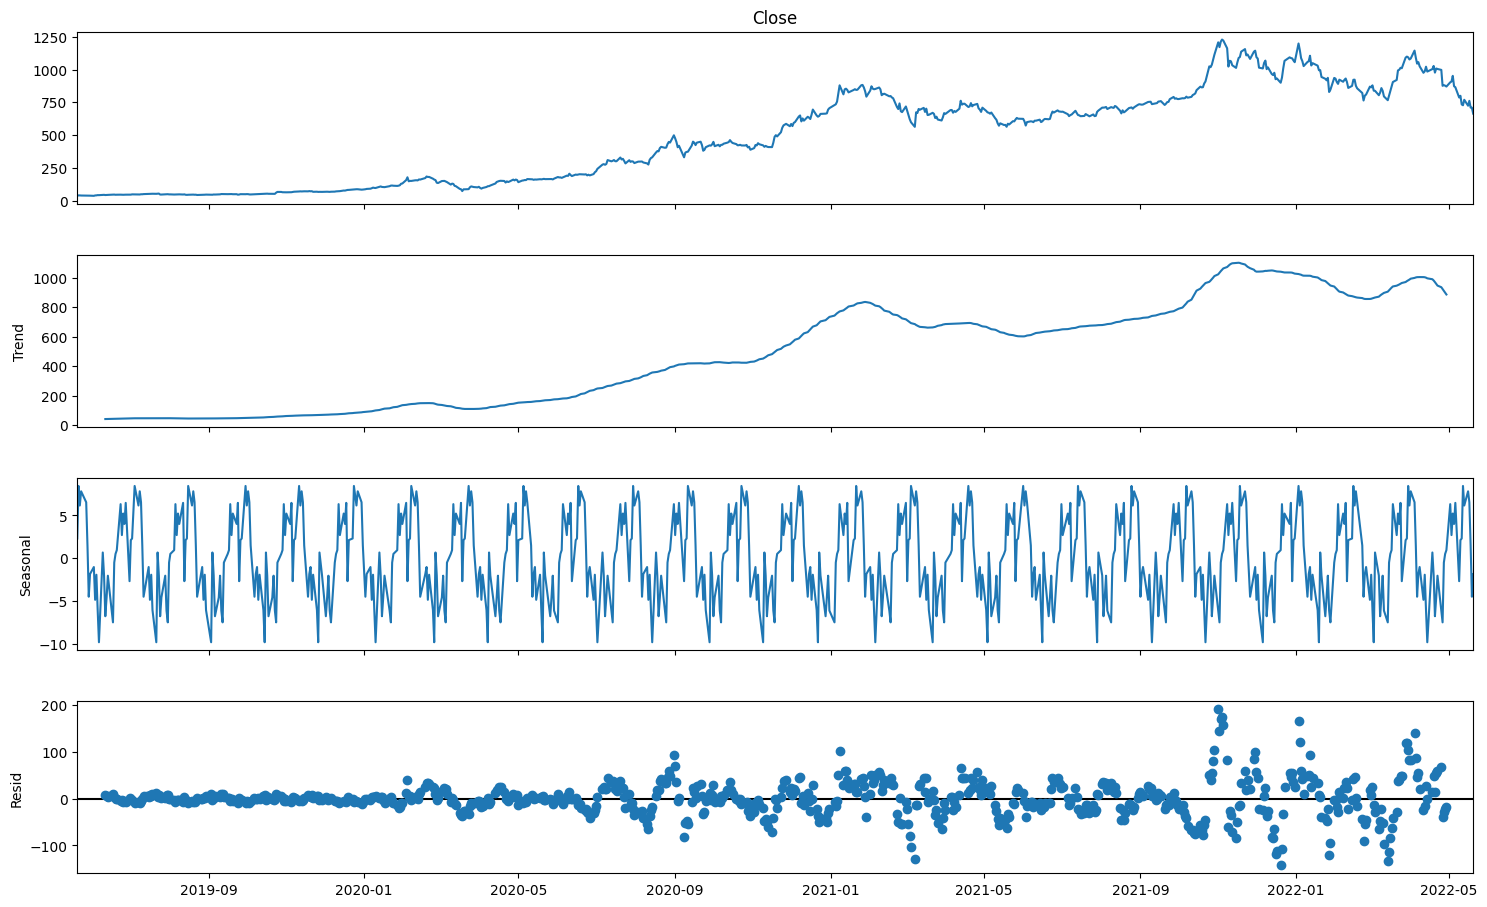

In [96]:
###
fig = plt.figure(figsize=(20,10))
fig = result.plot()
fig.set_size_inches(17,10)

<Figure size 2000x1000 with 0 Axes>

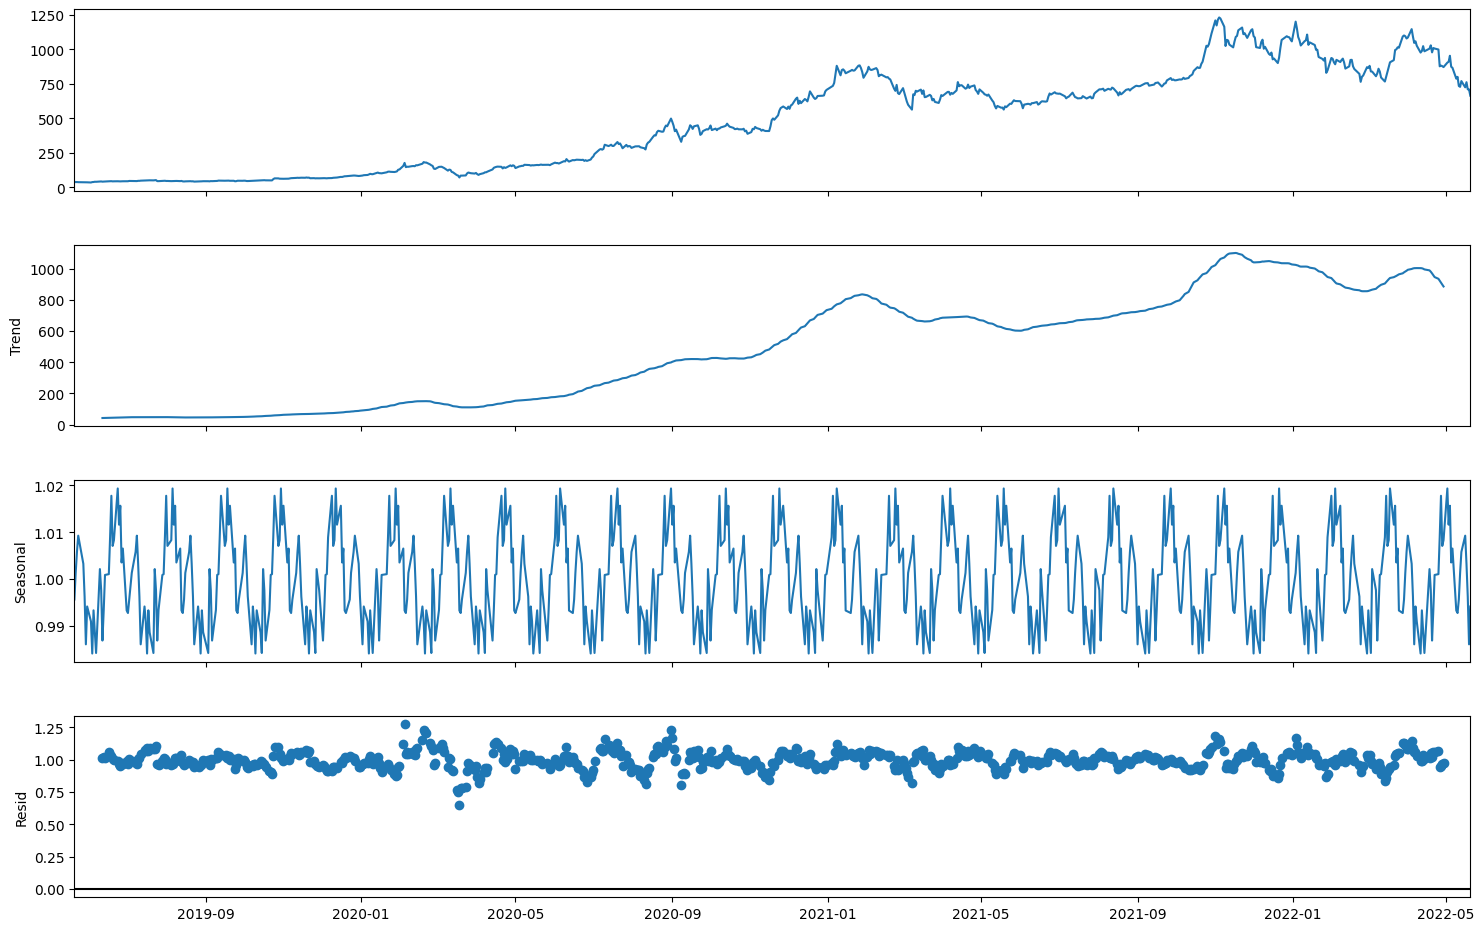

In [98]:
##Multiplicative model
result = seasonal_decompose(stock_data[["Close"]],model = "multiplicative",period = 30)
fig = plt.figure(figsize=(20,10))
fig = result.plot()
fig.set_size_inches(17,10)

- Plot the boxplot to chkec the outliers


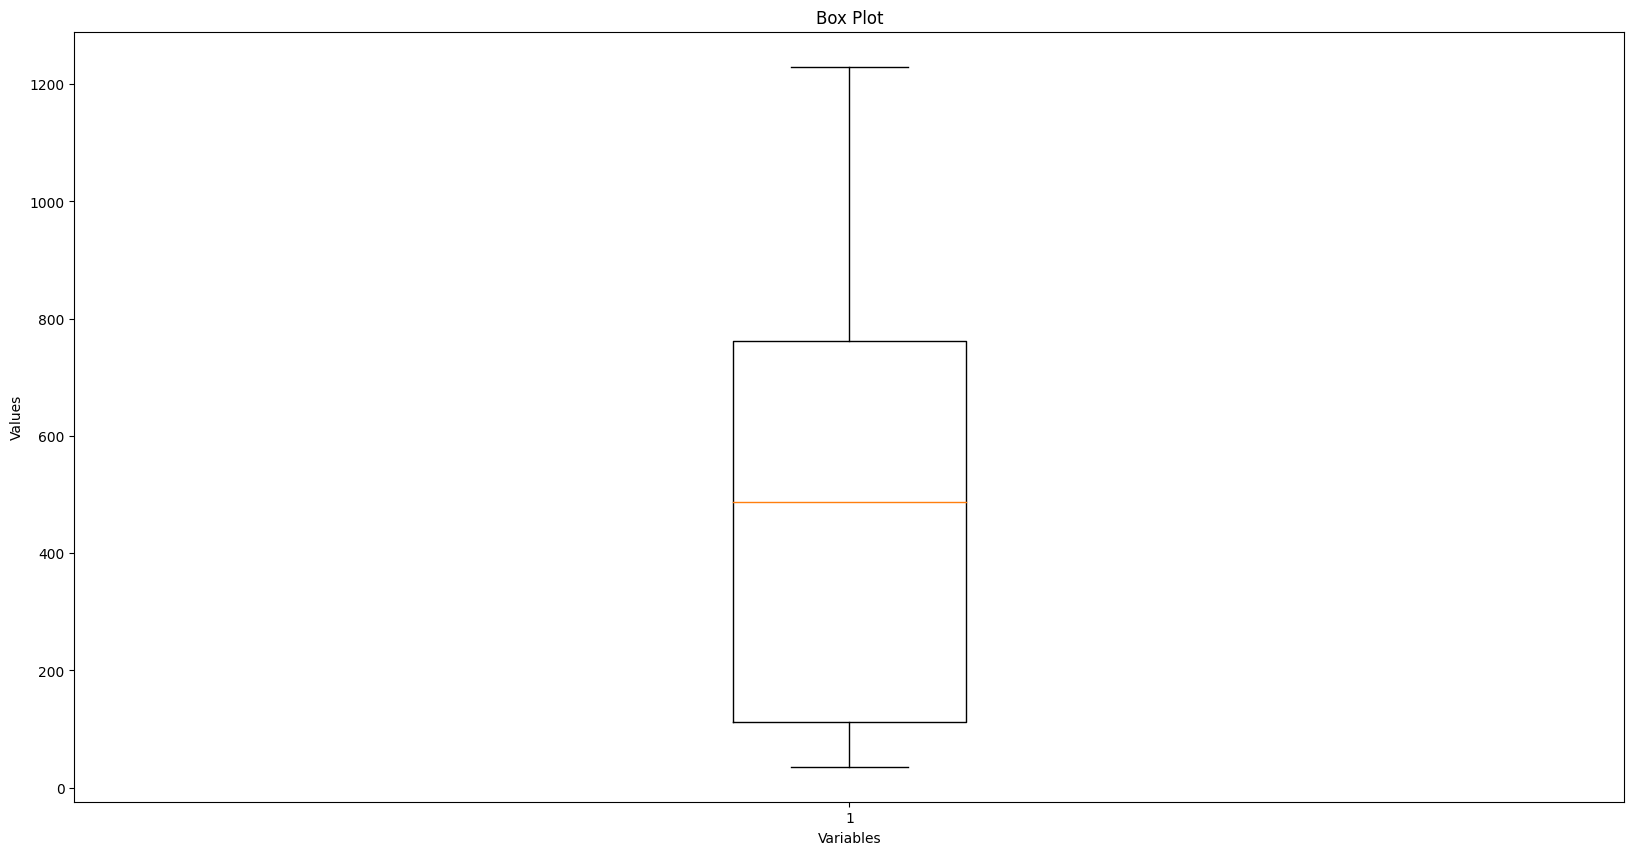

In [106]:
fig,ax = plt.subplots(figsize = (20,10))
#Plot the BoxPlot
ax.boxplot(stock_data['Close'])
#Set X- axis label
ax.set_xlabel('Variables')
#Set the y-axis Labes
ax.set_ylabel('Values')
#Set the title
ax.set_title('Box Plot')
#Show the Plot
plt.show()

- Now we'll create an ARIMA model and train it using the train data's stock closing price.
- So, let’s visualize the data by dividing it into training and test sets.

In [99]:
a=[1,2,3,4,5,6,7,8,9,10]

In [100]:
type(a)

list

In [101]:
a[0:7]

[1, 2, 3, 4, 5, 6, 7]

In [102]:
a[0:-3]

[1, 2, 3, 4, 5, 6, 7]

In [103]:
a[-3:]

[8, 9, 10]

In [104]:
range(len(a))

range(0, 10)

In [107]:
len(df_close)

758

### **Train and Test Split the Dataa**

In [108]:
train_data = df_close[0:-60]

In [109]:
test_data = df_close[-60:]

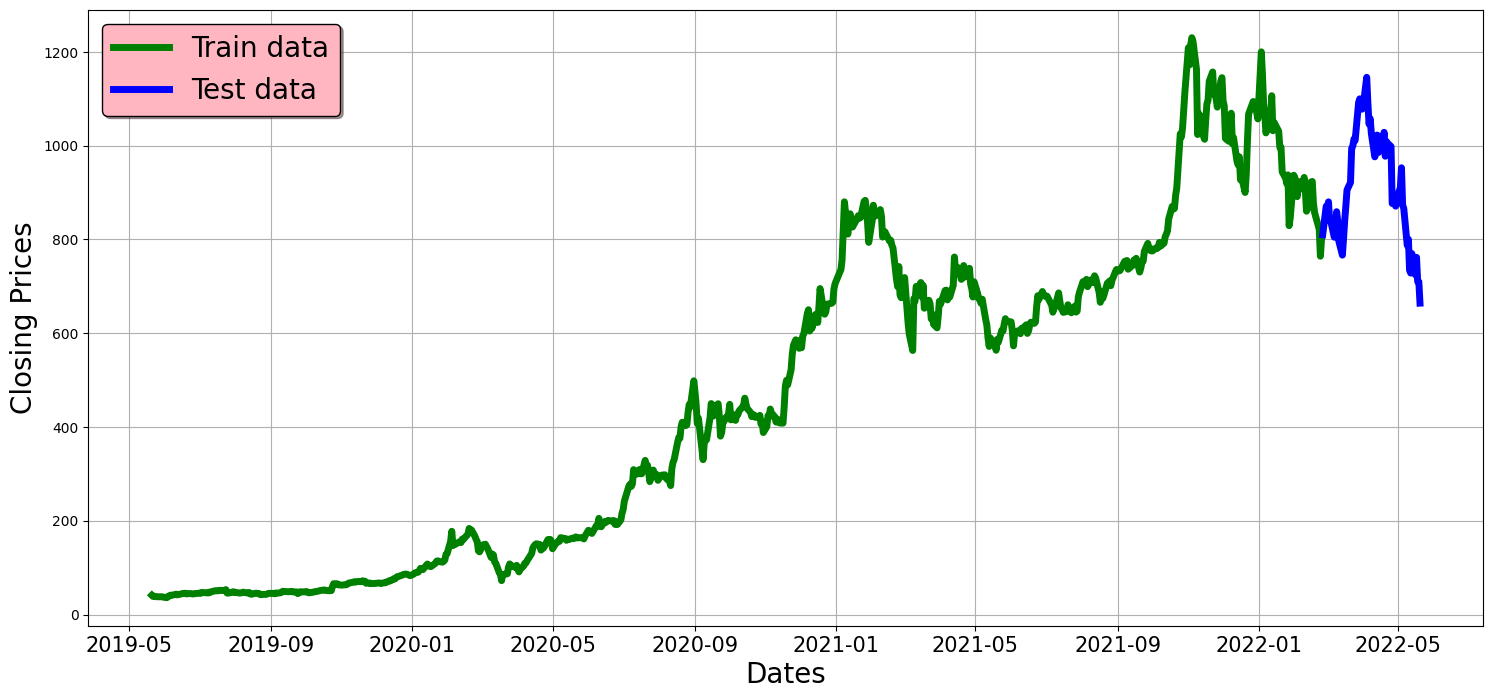

In [110]:
#split data into train and training set
train_data = df_close[0:-60]
test_data = df_close[-60:]
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.ylabel('Closing Prices', fontsize = 20)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.plot(train_data, 'green', label='Train data', linewidth = 5)
plt.plot(test_data, 'blue', label='Test data', linewidth = 5)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')

## Auto-correlations

After a time series has been stationarized by differencing, the next step in fitting an ARIMA model is to determine whether AR or MA terms are needed to correct any autocorrelation that remains in the differenced series.

By looking at the autocorrelation function (ACF) and partial autocorrelation (PACF) plots of the differenced series, you can tentatively identify the numbers of AR and/or MA terms that are needed.

-------------------------------------
- **Autocorrelation function plot (ACF):**
Autocorrelation refers to how correlated a time series is with its past values whereas the ACF is the plot used to see the correlation between the points, up to and including the lag unit. In ACF, the correlation coefficient is in the x-axis whereas the number of lags is shown in the y-axis.

Normally, we employ either the AR term or the MA term in an ARIMA model. Both of these phrases are rarely used on rare occasions. The ACF plot is used to determine which of these terms we should utilise for our time series.
 - If the autocorrelation at lag 1 is positive, we utilise the AR model.
 - If the autocorrelation at lag 1 is negative, we employ the MA model.

We move on to Partial Autocorrelation function plots (PACF) after plotting the ACF plot.

------------------------------
- **Partial Autocorrelation function plots (PACF)**
A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed. The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags.

If the PACF plot drops off at lag n, then use an AR(n) model and if the drop in PACF is more gradual then we use the MA term.

Use AR terms in the model when the
- ACF plots show autocorrelation decaying towards zero
- PACF plot cuts off quickly towards zero
- ACF of a stationary series shows positive at lag-1

Use MA terms in the model when the model is
- Negatively Autocorrelated at Lag — 1
- ACF that drops sharply after a few lags
- PACF decreases more gradually

<hr style="border:1px solid black"> </hr>

In [ ]:
var1=tsla_close_diff_1

In [ ]:
var=tsla_close_diff_1[1:]

In [ ]:
df=pd.DataFrame([var,var1])



In [ ]:
df.T.corr

<bound method DataFrame.corr of                 Close      Close
Date                            
2019-05-22        NaN  -2.469997
2019-05-23   0.551998   0.551998
2019-05-24  -0.972000  -0.972000
2019-05-28  -0.385998  -0.385998
2019-05-29   0.231998   0.231998
...               ...        ...
2022-05-16 -45.220032 -45.220032
2022-05-17  37.239990  37.239990
2022-05-18 -51.799988 -51.799988
2022-05-19  -0.390015  -0.390015
2022-05-20 -45.519958 -45.519958

[757 rows x 2 columns]>

In [111]:
#np.cor(var1,var)

### **ACF and PACF**

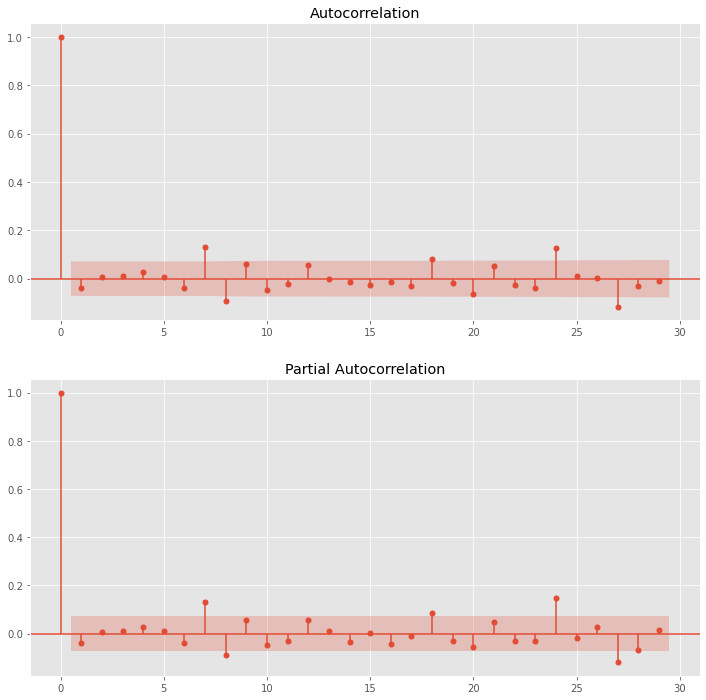

In [ ]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(211)#function
fig = plot_acf(tsla_close_diff_1, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(tsla_close_diff_1, ax=ax2)

- To estimate the amount of AR terms(**p**), you need to look at the PACF plot. First, ignore the value at lag 0.

- It will always show a perfect correlation, since we are estimating the correlation between today’s value with **itself**.

-  Note that there is a coloured area in the plot, representing the confidence interval.
-  To estimate how much AR terms you should use, start counting how many spikes are above or below the confidence interval before the next one enter the coloured area.
- So, looking at the PACF plot above, we can estimate to use 0 AR terms for our model, since no any spikes are out of the confidence interval.

---------------------------------------

- To calculate **d**, all you need to know how many differencing was used to make the series stationary.
- In our case, we have used order of 1st order differencing to make our data stationary.

---------------------------------------

- To estimate the amount of MA terms (**q**), this time you will look at ACF plot.
- The same logic is applied here: how many spikes are above or below the confidence interval before the next spike enters the coloured area? Here, we can estimate 0 MA terms, since no spike is out of the confidence interval.

So, we will use (0,1,0) order to fit ARIMA model.

We can also use different orders of p, d and q to get the best order with lowest AIC.

In [114]:
float("inf")

inf

In [185]:

# Evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, y, arima_order):
    # Prepare the training dataset
    # Create a list 'history' containing all historical values from X
    history = [x for x in X]
    # Initialize an empty list to store predictions
    predictions = list()

    # Loop through each value in the test dataset y
    for t in range(len(y)):
        # Create and fit the ARIMA model using the current history
        model = ARIMA(history, order=arima_order)  # Initialize the model with the specified (p,d,q)
        model_fit = model.fit()  # Fit the model to the historical data

        # Make a one-step-ahead forecast
        yhat = model_fit.forecast()[0]  # Forecast the next value
        predictions.append(yhat)  # Store the predicted value in the predictions list

        # Append the actual value from the test set to the history for the next iteration
        history.append(y[t])  # Update the history with the actual value from the test dataset

    # Calculate the Root Mean Squared Error (RMSE) between actual and predicted values
    rmse = np.sqrt(mean_squared_error(y, predictions))  # Calculate RMSE to evaluate model performance
    return rmse  # Return the RMSE value, which indicates the accuracy of the predictions


In [181]:
# evaluate different combinations of p, d and q values for an ARIMA model to get the best order for ARIMA Model
def evaluate_models(dataset, test, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))


In [ ]:
# Evaluate different combinations of p, d, and q values for an ARIMA model
# to get the best order for the ARIMA model
def evaluate_models(dataset, test, p_values, d_values, q_values):
    # Ensure the dataset is in float32 format for better performance with ARIMA
    dataset = dataset.astype('float32')

    # Initialize variables to store the best score (RMSE) and best configuration (p, d, q)
    best_score, best_cfg = float("inf"), None

    # Loop through each value of p in the provided p_values
    for p in p_values:
        # Loop through each value of d in the provided d_values
        for d in d_values:
            # Loop through each value of q in the provided q_values
            for q in q_values:
                # Create an order tuple for the current combination of (p, d, q)
                order = (p, d, q)
                try:
                    # Evaluate the ARIMA model with the current order using the defined function
                    rmse = evaluate_arima_model(dataset, test, order)

                    # Check if the RMSE is less than the best score found so far
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order  # Update best score and configuration

                    # Print the RMSE for the current ARIMA configuration
                    print('ARIMA%s RMSE=%.3f' % (order, rmse))
                except:
                    continue  # If an error occurs (e.g., model fitting fails), skip to the next combination

    # Print the best ARIMA configuration found and its corresponding RMSE
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))


In [182]:
p_values = range(0, 3)

In [117]:
list(p_values)

[0, 1, 2]

In [183]:
train_data

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002
...,...
2022-02-17,876.349976
2022-02-18,856.979980
2022-02-22,821.530029


In [119]:
test_data

,Close
Date,
2022-02-25,809.869995
2022-02-28,870.429993
2022-03-01,864.369995
2022-03-02,879.890015
2022-03-03,839.289978
2022-03-04,838.289978
2022-03-07,804.580017
2022-03-08,824.400024
2022-03-09,858.969971


In [184]:
# evaluate parameters
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(train_data, test_data, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=457.414
ARIMA(0, 0, 1) RMSE=241.164
ARIMA(0, 0, 2) RMSE=173.011
ARIMA(0, 1, 0) RMSE=39.516
ARIMA(0, 1, 1) RMSE=39.482
ARIMA(0, 1, 2) RMSE=39.617
ARIMA(0, 2, 0) RMSE=57.835
ARIMA(0, 2, 1) RMSE=39.611
ARIMA(0, 2, 2) RMSE=39.580
ARIMA(1, 0, 0) RMSE=39.477
ARIMA(1, 0, 1) RMSE=39.449
ARIMA(1, 0, 2) RMSE=39.584
ARIMA(1, 1, 0) RMSE=39.475
ARIMA(1, 1, 1) RMSE=39.555
ARIMA(1, 1, 2) RMSE=39.935
ARIMA(1, 2, 0) RMSE=46.184
ARIMA(1, 2, 1) RMSE=39.573
ARIMA(1, 2, 2) RMSE=39.731
ARIMA(2, 0, 0) RMSE=39.440
ARIMA(2, 0, 1) RMSE=39.494
ARIMA(2, 0, 2) RMSE=39.581
ARIMA(2, 1, 0) RMSE=39.635
ARIMA(2, 1, 1) RMSE=39.759
ARIMA(2, 1, 2) RMSE=39.656
ARIMA(2, 2, 0) RMSE=45.781
ARIMA(2, 2, 1) RMSE=39.739
ARIMA(2, 2, 2) RMSE=39.732
Best ARIMA(2, 0, 0) RMSE=39.440


In [ ]:
##################################################################################

In [180]:
##Herw we are pasing all the Combinations of P,D,Q values
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
#best_score, best_cfg = float("inf"), None
for p in p_values:
  for d in d_values:
    for q in q_values:
      print(p,d,q)
#order ########################################

0 0 0
0 0 1
0 0 2
0 1 0
0 1 1
0 1 2
0 2 0
0 2 1
0 2 2
1 0 0
1 0 1
1 0 2
1 1 0
1 1 1
1 1 2
1 2 0
1 2 1
1 2 2
2 0 0
2 0 1
2 0 2
2 1 0
2 1 1
2 1 2
2 2 0
2 2 1
2 2 2


In [186]:
arima_order = (2, 0, 0) #Got the less RMSE

In [187]:
history = [x for x in train_data]

In [188]:
history

[41.01599884033203,
 38.54600143432617,
 39.09799957275391,
 38.1259994506836,
 37.7400016784668,
 37.97200012207031,
 37.64400100708008,
 37.03200149536133,
 35.79399871826172,
 38.720001220703125,
 39.31800079345703,
 41.18999862670898,
 40.900001525878906,
 42.57600021362305,
 43.41999816894531,
 41.85200119018555,
 42.78200149536133,
 42.98400115966797,
 45.00600051879883,
 44.948001861572266,
 45.2859992980957,
 43.92399978637695,
 44.37200164794922,
 44.72800064086914,
 43.95199966430664,
 43.854000091552734,
 44.56800079345703,
 44.69200134277344,
 45.43399810791016,
 44.90999984741211,
 46.97999954223633,
 46.619998931884766,
 46.06800079345703,
 46.012001037597656,
 47.78400039672852,
 47.720001220703125,
 49.01599884033203,
 50.70000076293945,
 50.47600173950195,
 50.97200012207031,
 50.70800018310547,
 51.63600158691406,
 51.13600158691406,
 52.03400039672852,
 52.97600173950195,
 45.76399993896485,
 45.608001708984375,
 47.15399932861328,
 48.45199966430664,
 48.32199859619

In [189]:
from statsmodels.tsa.arima.model import ARIMA # import ARIMA from the new location

history = [x for x in train_data]

model = ARIMA(history, order=arima_order) # use updated ARIMA

In [190]:
model_fit = model.fit()


In [191]:
yhat = model_fit.summary()


In [192]:
yhat

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  698
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -3157.475
Date:                Fri, 04 Oct 2024   AIC                           6322.950
Time:                        18:58:18   BIC                           6341.143
Sample:                             0   HQIC                          6329.983
                                - 698                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        449.1037    277.753      1.617      0.106     -95.281     993.489
ar.L1          0.9716      0.025     38.945      0.000       0.923       1.020
ar.L2          0.0266      0.025      1.068      0.286      -0.022       0.075
sigma2       493.4141     11.653     42.344      0.000     470.576     516.253
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              2106.38
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):              29.24   Skew:                             0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [193]:
test_data[0]


809.8699951171875

In [199]:
# Create a history list from the training data
history = [x for x in train_data]
predictions = list()
conf_list = list()

# Loop through each time point in the test data
for t in range(len(test_data)):
    # Fit the ARIMA model with specified order
    model = ARIMA(history, order=(2, 0, 0))
    model_fit = model.fit()

    # Get forecast value
    fc = model_fit.forecast(alpha=0.05)  # Modify this line based on returned values

    # Check if confidence intervals are needed
    if isinstance(fc, tuple):
        predictions.append(fc[0])  # The forecasted value
        conf_list.append(fc[1])     # The confidence interval
    else:
        predictions.append(fc)       # Only forecast value if no tuple
        conf_list.append(None)        # No confidence interval available

    # Append the actual value from the test set to history
    history.append(test_data[t])

# Calculate RMSE for the predictions against actual test data
print('RMSE of ARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))


RMSE of ARIMA Model: 39.43992944070974


In [ ]:
##################################################################################

In [ ]:
predictions.append(yhat)
history.append(y[t])
    # calculate out of sample error
rmse = np.sqrt(mean_squared_error(y, predictions))

From both the method, we get the same order (0,1,0)

In [195]:
history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = ARIMA(history,order=(0,1,0))
    model_fit = model.fit()
    fc, se, conf = model_fit.forecast(alpha = 0.05)
    predictions.append(fc)
    conf_list.append(conf)
    history.append(test_data[t])
print('RMSE of ARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))

ValueError: not enough values to unpack (expected 3, got 1)

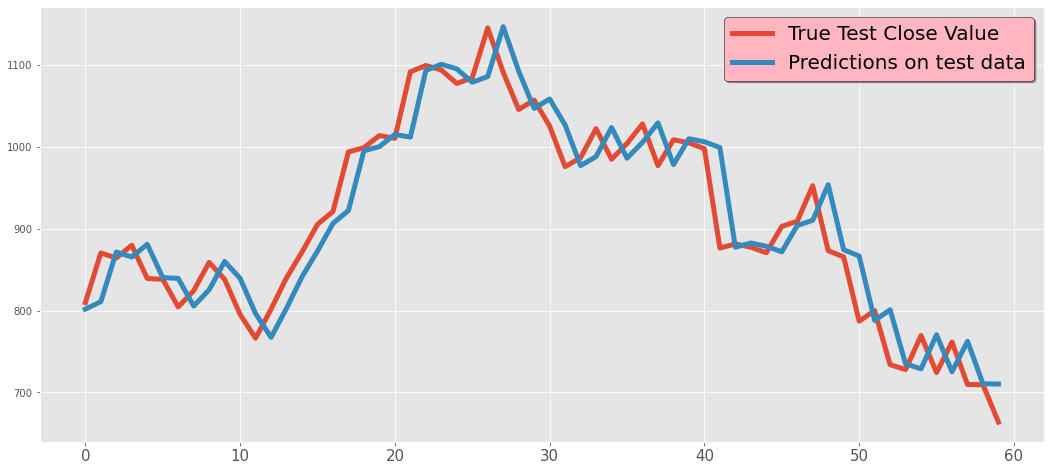

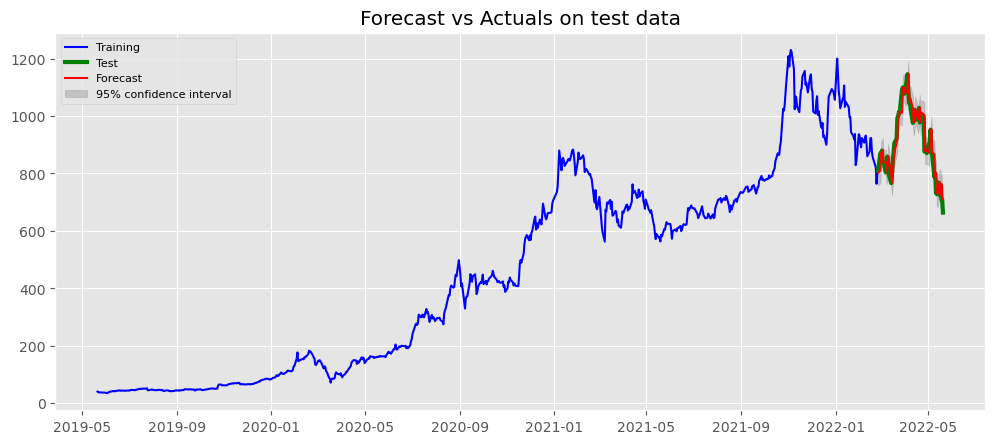

In [ ]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)),test_data, label = 'True Test Close Value', linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = 'Predictions on test data', linewidth = 5)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

# Make as pandas series
lower_series = []
upper_series = []
for i in conf_list:
    lower_series.append(i[0][0])
    upper_series.append(i[0][1])
fc_series = pd.Series(predictions, index=test_data.index)
lower_series = pd.Series(lower_series, index=test_data.index)
upper_series = pd.Series(upper_series, index=test_data.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='Training', color = 'blue')
plt.plot(test_data, label='Test', color = 'green', linewidth = 3)
plt.plot(fc_series, label='Forecast', color = 'red')
plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.15, label = '95% confidence interval')
plt.title('Forecast vs Actuals on test data')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Forecasting for next 60 days

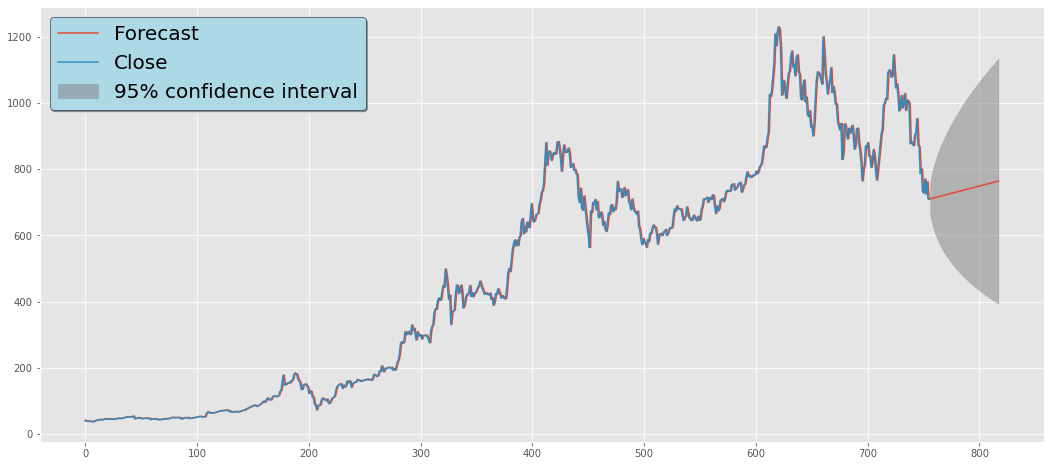

In [ ]:
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(111)
model_fit.plot_predict(start=1, end=len(df_close)+60, ax = ax1)
plt.grid("both")
plt.legend(['Forecast','Close','95% confidence interval'],fontsize = 20, shadow=True,facecolor='lightblue',edgecolor = 'k')
plt.show()


Although our model is good but this model has trouble forecasting long-term data. This is possible because ARIMA is a sensitive algorithm and not a broad algorithm for predicting. Stock data, on the other hand, rarely show seasonality that can be detected using the ARIMA model.
Forecasting is thought to be easier if there is a visible or hidden pattern that repeats itself throughout time.
Stock prices, on the other hand, are far too complicated to be modelled. There are so may external and dynamic factor affecting the price.


<hr style="border:1px solid black"> </hr>

- A problem with ARIMA is that it does not support seasonal data.
-  That is a time series with a repeating cycle.
- ARIMA expects data that is either not seasonal or has the seasonal component removed,
 - e.g. seasonally adjusted via methods such as seasonal differencing

#  Introduction to SARIMA Models

SARIMA (Seasonal ARIMA) is a modification of ARIMA that explicitly allows univariate time series data with a seasonal component. SARIMA accepts an additional set of parameters (P,D,Q)m that specify the model's seasonal components.

- P: Seasonal auto regressive order
- D: Seasonal difference order
- Q: Seasonal moving average order
- m: The number of time steps for a single seasonal period

This is written as (p,d,q)×(P,D,Q)m.

- From the ACF and PACF that we have plotted, we can determine the value of Seasonal (P,D,Q).
    In ACF and PACF, we have one spike at lag 3 that is out of confidence interval and also there is no significant correlation at lag 3 and lag 6. So, the order of P and Q is (1, 1).
    As we have used differencing of 1 to make data stationary so, D = 1. So, the best order for SARIMA is(0,1,0)x(1,1,1)3

In [200]:
train_data=tsla_close_diff_1[0:-60]
test_data=tsla_close_diff_1[-60:]

In [203]:
history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = sm.tsa.statespace.SARIMAX(history, order = (0,1,0), seasonal_order = (1,1,1,3))
    model_fit = model.fit()
    fc = model_fit.forecast()
    predictions.append(fc)
    history.append(test_data[t])
print('RMSE of SARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))

RMSE of SARIMA Model: 57.86925258260208


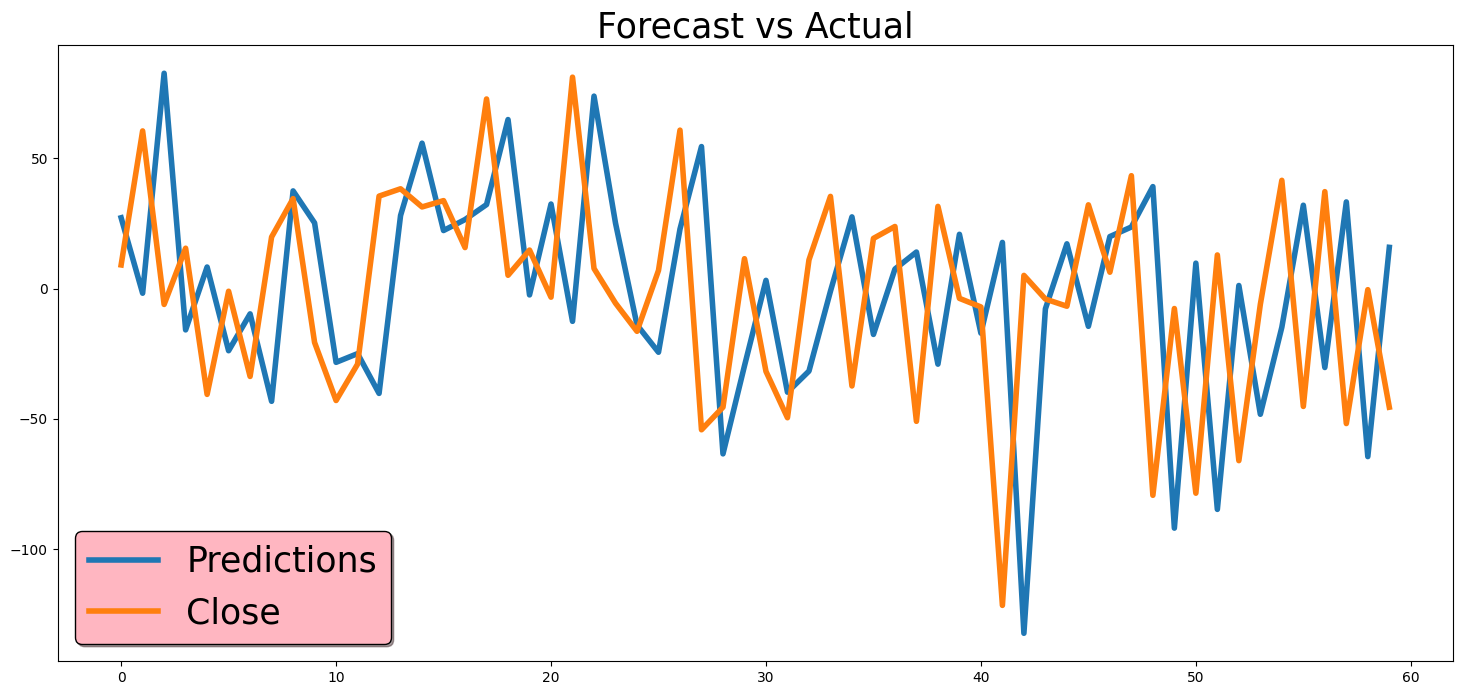

In [204]:
plt.figure(figsize=(18,8))
plt.title('Forecast vs Actual', fontsize = 25)
plt.plot(range(60), predictions, label = 'Predictions', linewidth = 4)
plt.plot(range(60), test_data, label = 'Close', linewidth = 4)
plt.legend(fontsize = 25, shadow=True,facecolor='lightpink',edgecolor = 'k')

## Auto ARIMA

Automatically discover the optimal order for an ARIMA model.
After identifying the most optimal parameters for an ARIMA model, the auto arima function provides a fitted ARIMA model. This function is based on the commonly used forecast::auto. Arima R function.

The auro arima function fits models within the start p, max p, start q, max q ranges using differencing tests (e.g., Kwiatkowski–Phillips–Schmidt–Shin, Augmented Dickey–Fuller, or Phillips–Perron) to identify the order of differencing, d. If the seasonal option is enabled, D, auto arima additionally aims to identify the ideal P and Q hyper-parameters after doing the Canova-Hansen to determine the optimal order of seasonal differencing.

RMSE of Auto ARIMA Model : 39.61388467968555


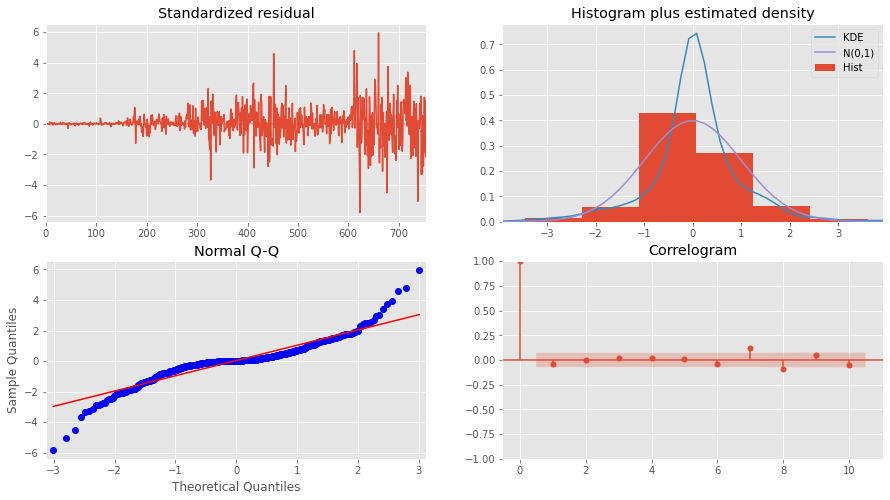

In [ ]:
train_data=df_close[0:-60]
test_data=df_close[-60:]
history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model_autoARIMA = auto_arima(history, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,
                      start_P=0,
                      D=0,
                      trace=False,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
    fc, confint = model_autoARIMA.predict(n_periods=1, return_conf_int=True)
    predictions.append(fc)
    history.append(test_data[t])
    conf_list.append(confint)

print('RMSE of Auto ARIMA Model :', np.sqrt(mean_squared_error(test_data, predictions)))
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

**Top left**: The residual errors appear to have a uniform variance and fluctuate around a mean of zero.

**Top Right**: The density plot on the top right suggests a normal distribution with a mean of zero.

**Bottom left**: The red line should be perfectly aligned with all of the dots. Any significant deviations would indicate a skewed distribution.

**Bottom Right**: The residual errors are not autocorrelated, as shown by the Correlogram, also known as the ACF plot. Any autocorrelation would imply that the residual errors have a pattern that isn’t explained by the model. As a result, you’ll need to add more Xs (predictors) to the model.

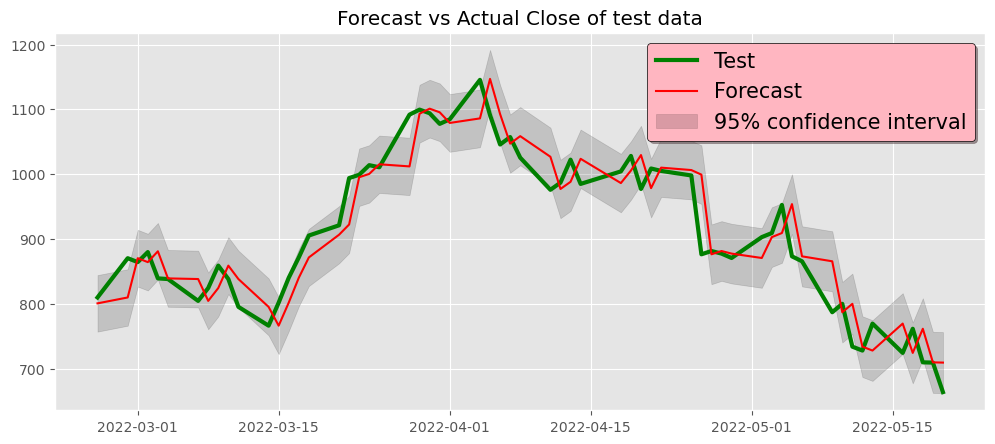

In [ ]:
lower_series = []
upper_series = []
for i in conf_list:
    lower_series.append(i[0][0])
    upper_series.append(i[0][1])
fc_series = pd.Series(predictions, index=test_data.index)
lower_series = pd.Series(lower_series, index=test_data.index)
upper_series = pd.Series(upper_series, index=test_data.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
# plt.plot(train_data, label='Training', color = 'blue')
plt.plot(test_data, label='Test', color = 'green', linewidth = 3)
plt.plot(fc_series, label='Forecast', color = 'red')
plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.15, label = '95% confidence interval')
plt.title('Forecast vs Actual Close of test data')
plt.legend(fontsize = 15, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

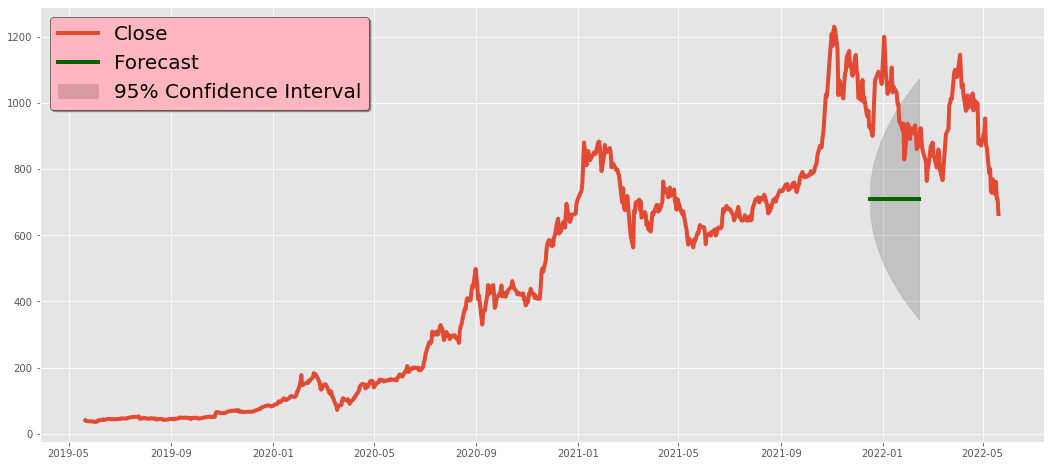

In [ ]:
fc, confint = model_autoARIMA.predict(n_periods=60, return_conf_int=True)

# make series for plotting purpose
fc_series = pd.Series(fc, index=pd.date_range(start='17/12/2021', periods=60))
lower_series = pd.Series(confint[:, 0], index=pd.date_range(start='17/12/2021', periods=60))
upper_series = pd.Series(confint[:, 1], index=pd.date_range(start='17/12/2021', periods=60))

# Plot
plt.figure(figsize = (18,8))
plt.plot(df_close, linewidth = 4, label = 'Close')
plt.plot(fc_series, color='darkgreen', linewidth = 4, label = 'Forecast')
plt.fill_between(lower_series.index,
                 lower_series,
                 upper_series,
                 color='k', alpha=.15, label = '95% Confidence Interval')
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

### **ACF and PACF**

<Figure size 1200x1200 with 0 Axes>

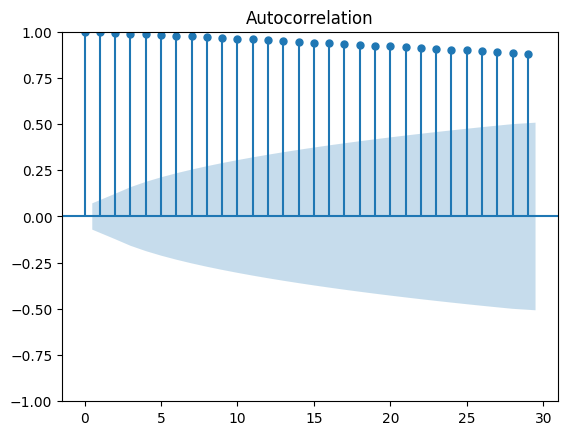

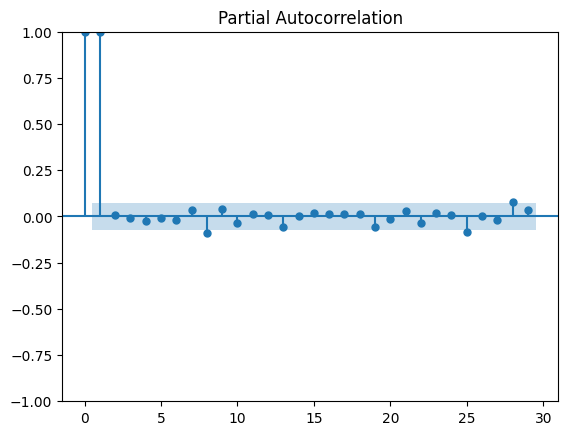

In [136]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plt.figure(figsize=(12,12))
plot_acf(stock_data['Close'])
plot_pacf(stock_data['Close'])
plt.show()

### **PerProcessing The Data**

1. Fill the missing values(here not Requried)
2. Convert the Data into Stationaty TimeSeries
3. If neseccsary then normlaize the Data(here not requried)
4. Split the Data into Train and test
5. Clean the Data by Removing the Outliers(here not REquried)

In [137]:
df_close = stock_data['Close']

In [139]:
df_close.diff() #first Diffrence

,Close
Date,
2019-05-21,NaN
2019-05-22,-2.469997
2019-05-23,0.551998
2019-05-24,-0.972000
2019-05-28,-0.385998
...,...
2022-05-16,-45.220032
2022-05-17,37.239990
2022-05-18,-51.799988


In [141]:
df_close.diff(2) #Second Diffrence

,Close
Date,
2019-05-21,NaN
2019-05-22,NaN
2019-05-23,-1.917999
2019-05-24,-0.420002
2019-05-28,-1.357998
...,...
2022-05-16,-3.630005
2022-05-17,-7.980042
2022-05-18,-14.559998


In [142]:
df_close.diff(3) #Thired Diffrence

,Close
Date,
2019-05-21,NaN
2019-05-22,NaN
2019-05-23,NaN
2019-05-24,-2.889999
2019-05-28,-0.806000
...,...
2022-05-16,-9.630005
2022-05-17,33.609985
2022-05-18,-59.780029


In [145]:
###
tsla_close_diff_1 = df_close.diff()

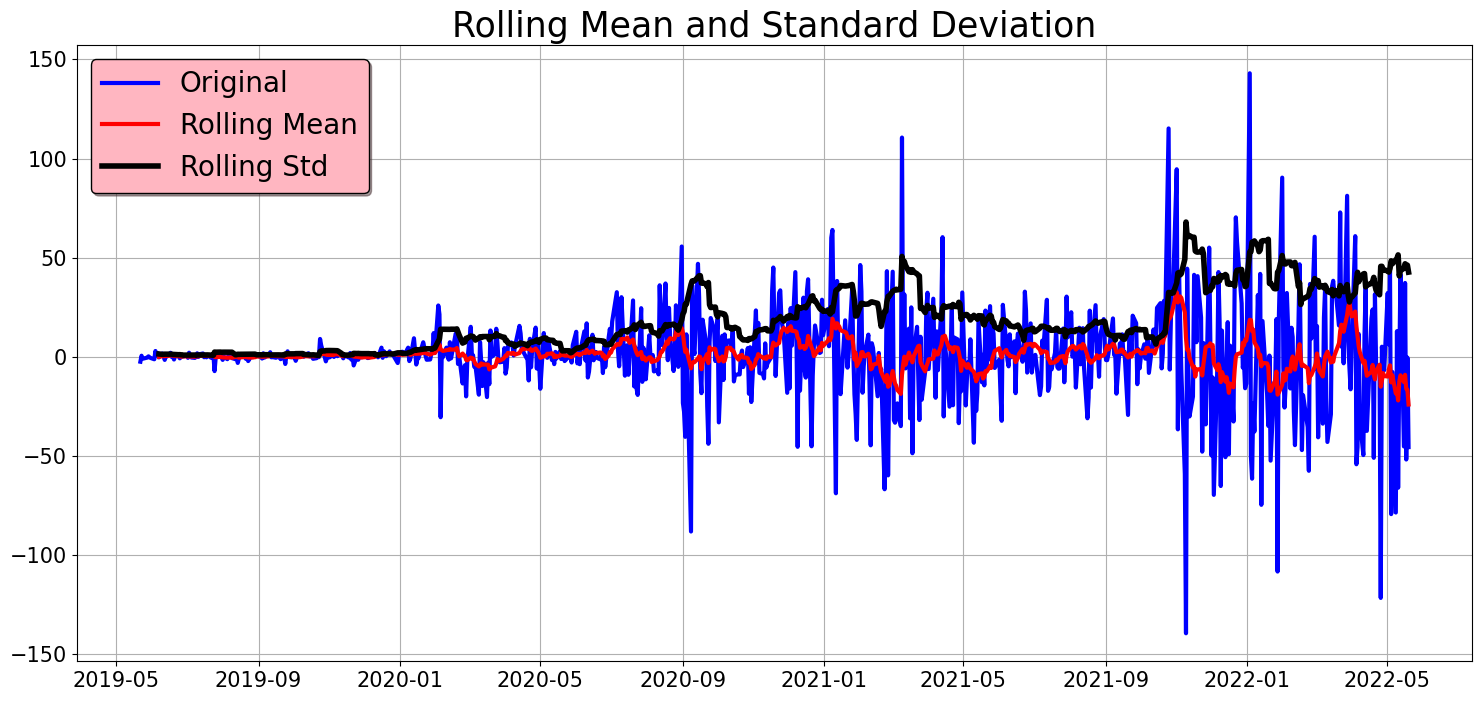

Results of the Dickey-Fuller test:
Test Statistic                -8.324564e+00
p-value                        3.498786e-13
No. of Lags Used               8.000000e+00
Number of Observations Used    7.480000e+02
Critical Value (1%)           -3.439123e+00
Critical Value (5%)           -2.865412e+00
Critical Value (10%)          -2.568832e+00
dtype: float64
Reject null hypothesis, the data is stationary


In [147]:
tsla_close_diff_1 =tsla_close_diff_1.dropna()
#Check the  Stationary , with the diff_2
test_stationarity(tsla_close_diff_1)

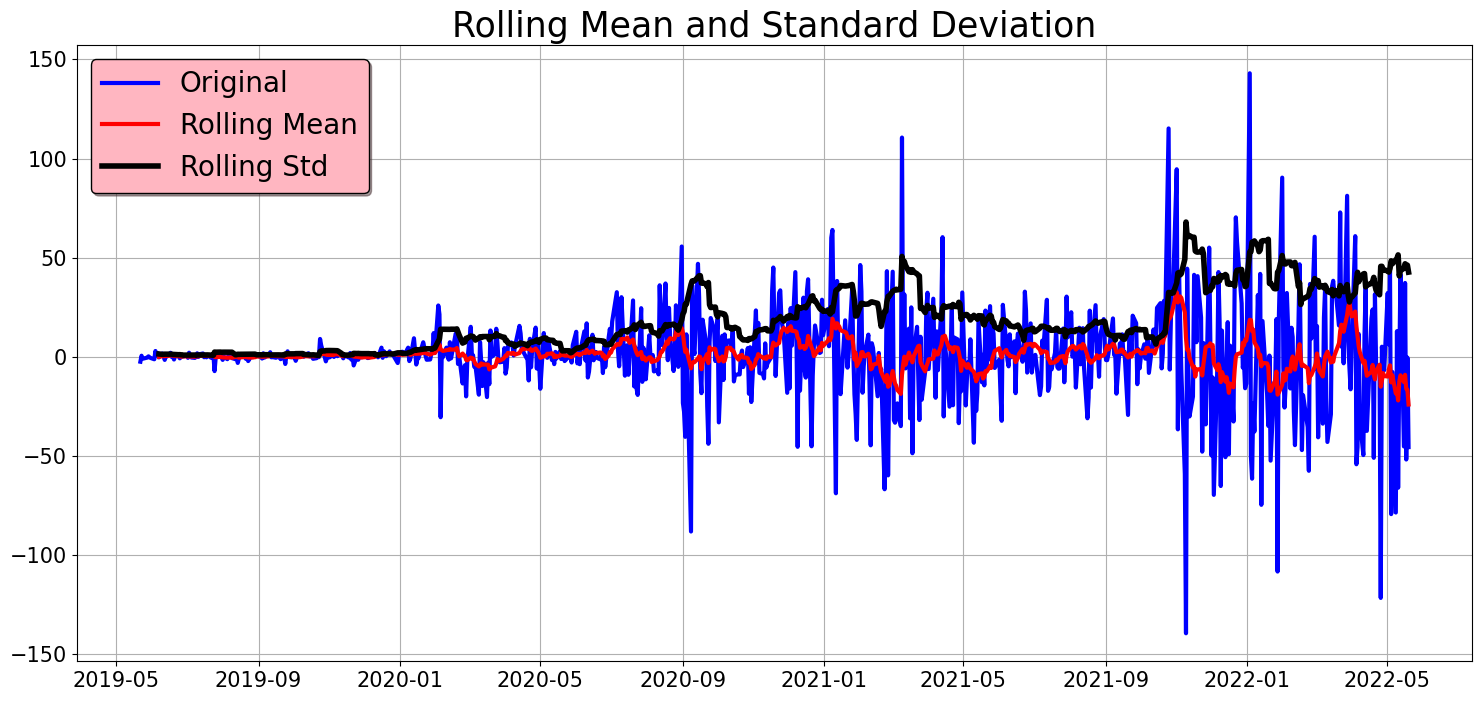

Results of the Dickey-Fuller test:
Test Statistic                -8.324564e+00
p-value                        3.498786e-13
No. of Lags Used               8.000000e+00
Number of Observations Used    7.480000e+02
Critical Value (1%)           -3.439123e+00
Critical Value (5%)           -2.865412e+00
Critical Value (10%)          -2.568832e+00
dtype: float64
Reject null hypothesis, the data is stationary


In [148]:
##Diff2
### Check the diff2 Stationary
tsla_close_diff_2 = df_close.diff()
tsla_close_diff_2 =tsla_close_diff_2.dropna()
test_stationarity(tsla_close_diff_2)


### **TRain-Test-Split**

In [149]:
df_close.head()

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002


In [154]:
#split data into train and training set
train_data = df_close[0:-60] #taking the first to last -60 data
test_data = df_close[-60:] #last -60 to last -1 data


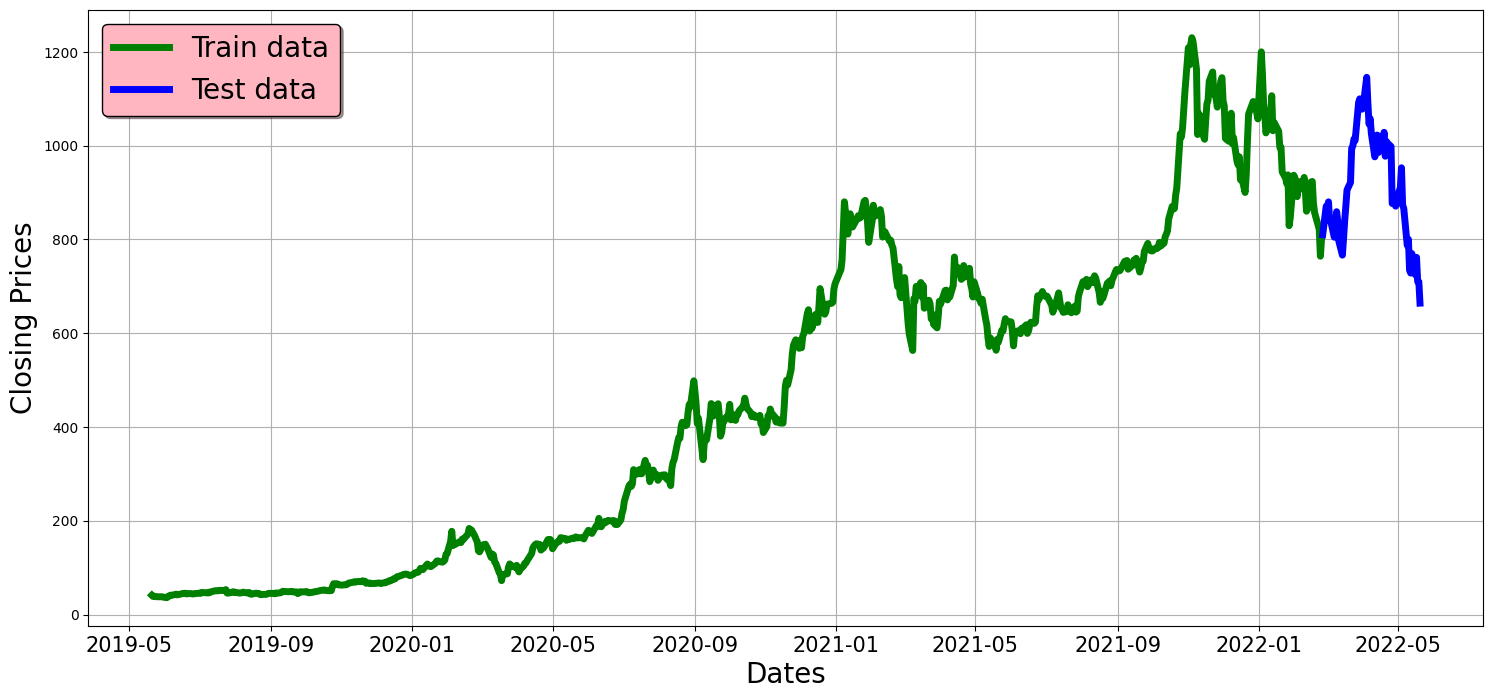

In [155]:
##Plot the  next 60 Days
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.ylabel('Closing Prices', fontsize = 20)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.plot(train_data, 'green', label='Train data', linewidth = 5)
plt.plot(test_data, 'blue', label='Test data', linewidth = 5)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')

In [173]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error ,mean_squared_error

In [160]:
history = [x for x in train_data]
history

[41.01599884033203,
 38.54600143432617,
 39.09799957275391,
 38.1259994506836,
 37.7400016784668,
 37.97200012207031,
 37.64400100708008,
 37.03200149536133,
 35.79399871826172,
 38.720001220703125,
 39.31800079345703,
 41.18999862670898,
 40.900001525878906,
 42.57600021362305,
 43.41999816894531,
 41.85200119018555,
 42.78200149536133,
 42.98400115966797,
 45.00600051879883,
 44.948001861572266,
 45.2859992980957,
 43.92399978637695,
 44.37200164794922,
 44.72800064086914,
 43.95199966430664,
 43.854000091552734,
 44.56800079345703,
 44.69200134277344,
 45.43399810791016,
 44.90999984741211,
 46.97999954223633,
 46.619998931884766,
 46.06800079345703,
 46.012001037597656,
 47.78400039672852,
 47.720001220703125,
 49.01599884033203,
 50.70000076293945,
 50.47600173950195,
 50.97200012207031,
 50.70800018310547,
 51.63600158691406,
 51.13600158691406,
 52.03400039672852,
 52.97600173950195,
 45.76399993896485,
 45.608001708984375,
 47.15399932861328,
 48.45199966430664,
 48.32199859619

In [174]:
model = ARIMA(history,order = (1,1,1)) # create the model
model_fit = model.fit() # fit the model
model_fit.summary() # call summary on the fitted model

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  698
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3150.350
Date:                Fri, 04 Oct 2024   AIC                           6306.700
Time:                        18:27:19   BIC                           6320.340
Sample:                             0   HQIC                          6311.974
                                - 698                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2397      0.699      0.343      0.731      -1.129       1.609
ma.L1         -0.2713      0.690     -0.393      0.694      -1.623       1.080
sigma2       493.6767     11.690     42.231      0.000     470.765     516.588
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2111.30
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              31.69   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [175]:
##Check the ForeCasted Value
model_fit.forecast()[0]

800.2043832076607

In [176]:
test_data[0] ##Original Value

809.8699951171875

In [177]:
#Check the mean Squared Error
from sklearn.metrics import mean_squared_error
mean_squared_error([test_data[0]],[model_fit.forecast()[0]]) # Pass the values as single-element lists

93.42405358558581

In [161]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming df_close is your DataFrame with closing prices
# Let's say df_close['Close'] is the column with your closing prices
# Create the training and test sets
train_data = df_close[0:-60]
test_data = df_close[-60:]

# Fit the ARIMA model (adjust p, d, q based on your analysis)
model = ARIMA(train_data, order=(5, 1, 0))  # Example order, you may need to optimize this
model_fit = model.fit()

# Forecast the next 60 days
forecast = model_fit.forecast(steps=60)


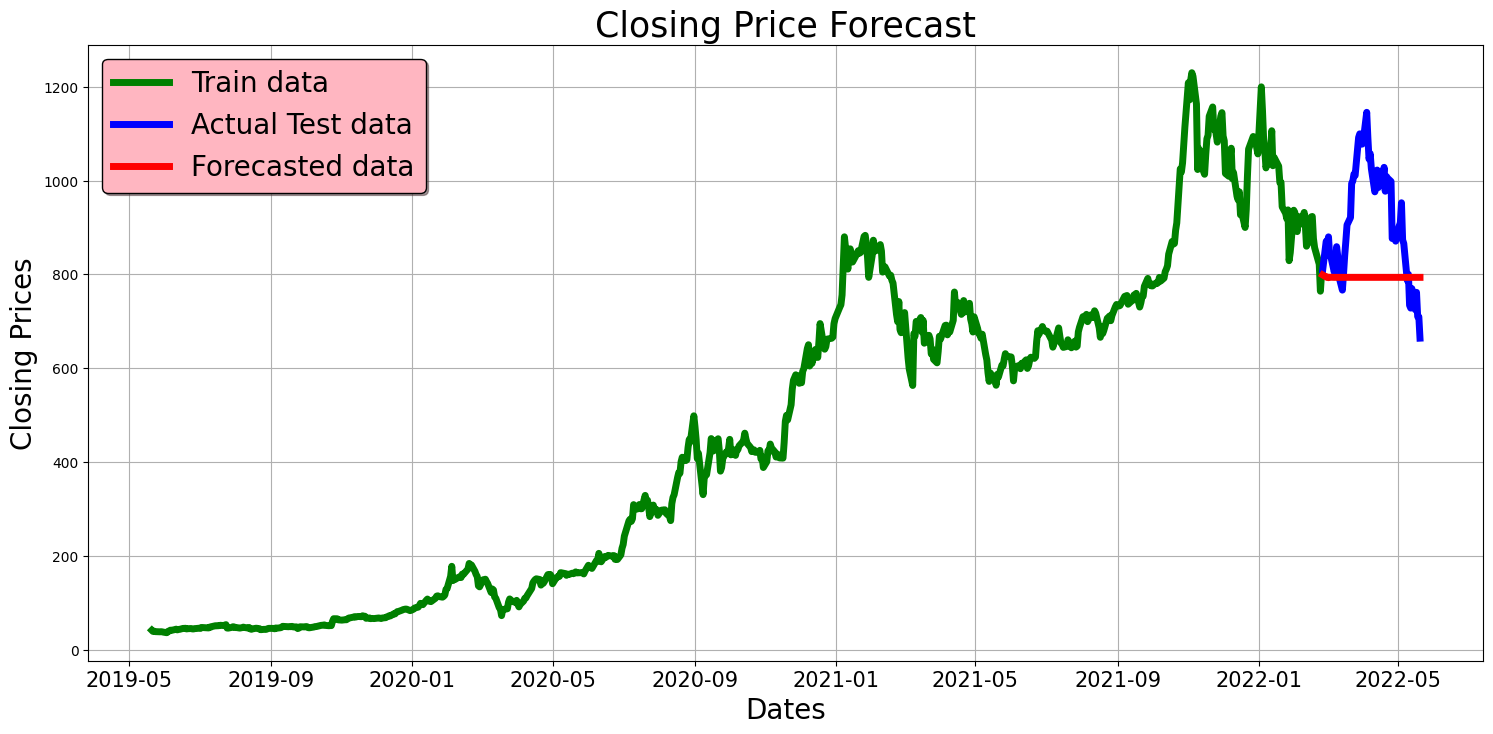

In [162]:
# Plot the results
plt.figure(figsize=(18, 8))
plt.grid(True)
plt.xlabel('Dates', fontsize=20)
plt.ylabel('Closing Prices', fontsize=20)
plt.xticks(fontsize=15)

# Plot the training data
plt.plot(train_data, 'green', label='Train data', linewidth=5)

# Plot the test data
plt.plot(test_data.index, test_data, 'blue', label='Actual Test data', linewidth=5)

# Plot the forecasted data
plt.plot(test_data.index, forecast, 'red', label='Forecasted data', linewidth=5)

# Add legend
plt.legend(fontsize=20, shadow=True, facecolor='lightpink', edgecolor='k')
plt.title('Closing Price Forecast', fontsize=25)
plt.show()
